Step-1 :
Business Problem Understanding
1. previously,we explored is there a relationship between total advertisting spend and sales? as well as predicting the total sales for some value for some value of total spend
2. What is the relationship between each advertising channel (TV , Radio, Newspaper), and Sales?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns


step -2 : data understanding
load data & understand every variable

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()


,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df["TV"].unique().shape


(190,)

Dataset Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Step -3 : data preprocessing

exploratory data analysis

On the basis of this data, how should you spend advertising money in the future? These general questions might lead you to more specfic questions:


1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending, can sales be predicted?


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


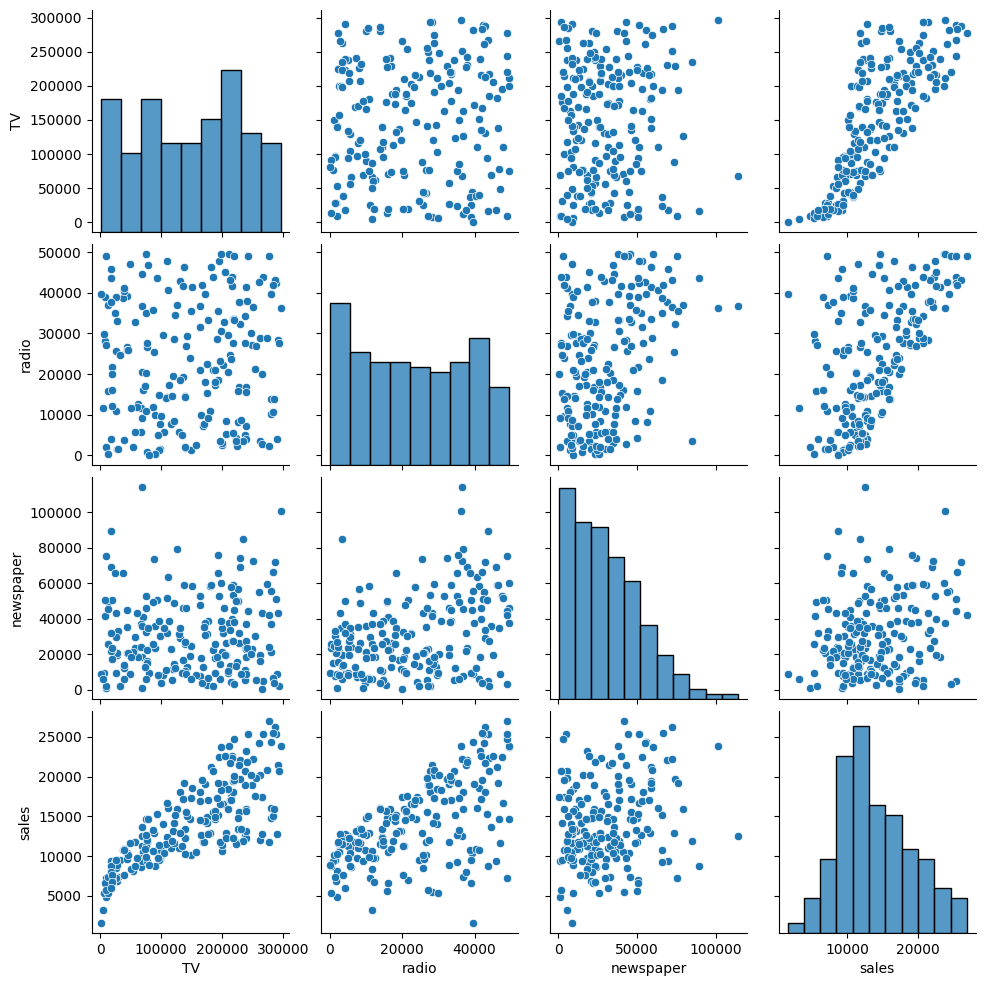

In [7]:
sns.pairplot(df)
plt.show()

by obersving the scatter plot, we made an assumption of the relation between y and (x1+x2+x3) is linear

In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


1. The realtion between y and x should be high.. The higher the value the stronger the correaltion, better accuracy
2. The relation between any two independent variables should be  low

if the correlation between any 2 independent variables is strong , then it is called as colinearity problem 

Data Cleaning

In [9]:
# for this dataset , no data cleaning requied

Data Wangling

In [10]:
# for this data set, no encoding required

X&Y

In [11]:
X=df[["TV","radio","newspaper"]]
Y=df["sales"]

Train-Test Spilt

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=9)

step-4:Modelling

multiple Linear Regression  :
Linear regression include multiple input features . This is done by least squares method.

In [13]:
X_train

,TV,radio,newspaper
146,240100,7300,8700
169,284300,10600,6400
145,140300,1900,9000
55,198900,49400,60000
21,237400,5100,23500
...,...,...,...
56,7300,28100,41400
182,56200,5700,29700
199,232100,8600,8700
92,217700,33500,59000


In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
print("Intercept :",model.intercept_)
print("COefficients :",model.coef_)

Intercept : 2993.523896904102
COefficients : [ 0.04564499  0.18826117 -0.00196948]


In [15]:
#prediction
test_predictions = model.predict(X_test)

Model Selection

Check Whether model has overfitting or underfitting problem


In [16]:
train_predicitons= model.predict(X_train)
print("Train R2 : ", model.score(X_train,Y_train))

Train R2 :  0.8897851719766416


Check whether test accuracy = cross validation score

In [17]:
from sklearn.model_selection import cross_val_score
print("Cross Validation Score :",cross_val_score(model,X,Y,cv=5).mean())

Cross Validation Score : 0.8871063495438435


Check for Assumptions
1. Linearity of Errors

In [18]:
test_res =Y_test- test_predictions

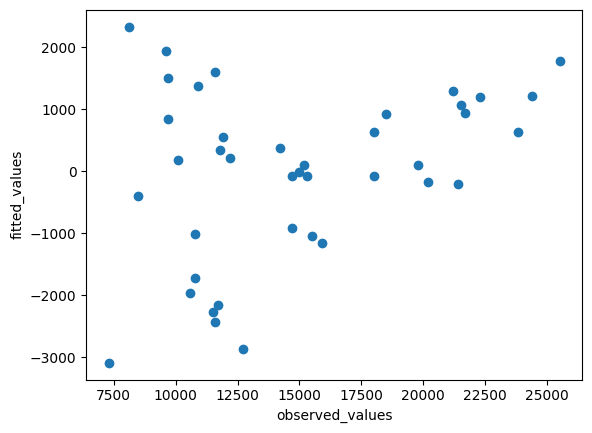

In [19]:
plt.scatter(Y_test,test_res)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

2. Normality of Errors

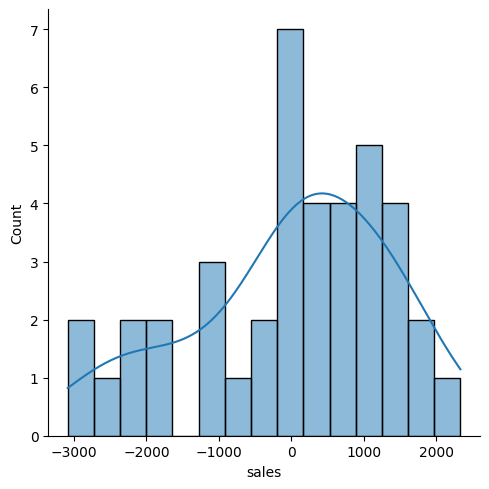

In [20]:
sns.displot(test_res,bins=15,kde=True)

3. Equal variance of Errors(Homoscadesicity)

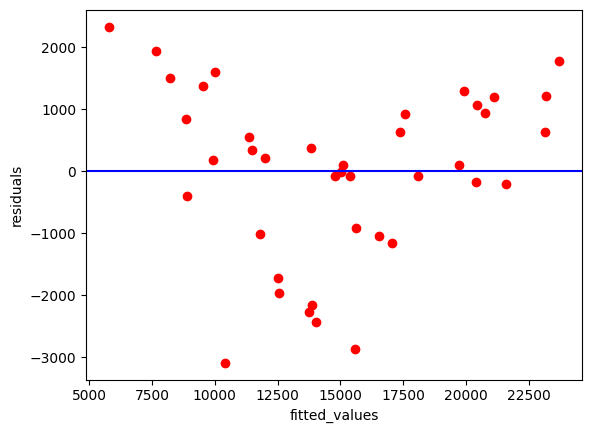

In [21]:
plt.scatter(test_predictions,test_res,c="r")
plt.axhline(y=0,color="blue")
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

4. Variables significance
Hypothesis Testing for variables

. Null hypothesis : There is no relationship between input variable and out put variable ( and thus β1 equal zero ).
. Alternative hypothesis : There is a a realtionship between input variable and output variable (and thus β1 is not equal to zero)

In [22]:
import statsmodels.formula.api as smf
model1=smf.ols("Y~X",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           1.58e-96
Time:                        11:19:54   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3543.
Df Residuals:                     196   BIC:                             3557.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2938.8894    311.908      9.422      0.000    2323.762    3554.016
X[0]           0.0458      0.001     32.809      0.000       0.043       0.049
X[1]           0.1885      0.009     21.893      0.000       0.172       0.206
X[2]          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                     4.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Added variable plot (AV plot)
. partial differention insted of normal differentiation

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future ve

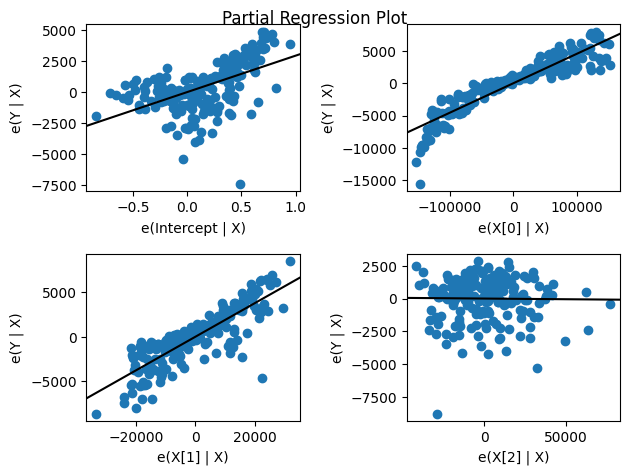

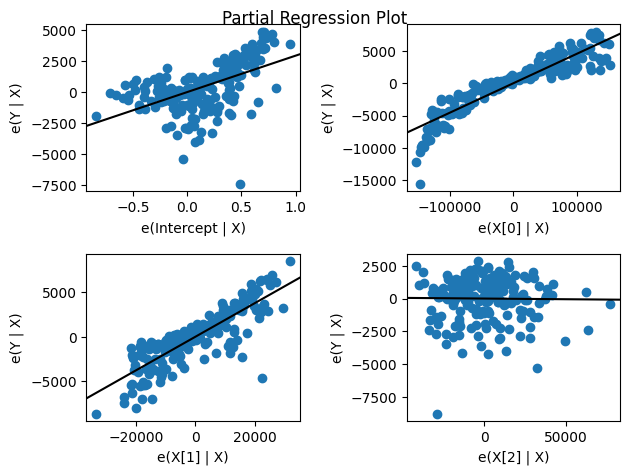

In [23]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)

added variable plot is no showing any significance for newspaper

final model including TV and Radia only

In [24]:
X=df[["TV","radio"]]
Y=df["sales"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=9)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
print("Intercept :",model.intercept_)
print("Coefficients :",model.coef_)

train_predicitons=model.predict(X_train)
test_predictions=model.predict(X_test)

print("Train R2 :",model.score(X_train,Y_train))
print("Test R2 :",model.score(X_test,Y_test))
print("Cross Validation Score :",cross_val_score(model,X,Y,cv=5).mean())

Intercept : 2957.362113820711
Coefficients : [0.04565331 0.18718911]
Train R2 : 0.8897265958178805
Test R2 : 0.9258743223517102
Cross Validation Score : 0.889282957306453


interpreting the coefficients
1. holding all other feature fixed, a 1 unit increase in TV spend is associated with an increase fo 0.0456 units in sales
2. This basically means that for every $ 1000 dollars spend on Tv ads, we could expect 45 more unit sold. 

1. Holding all other features fixed, a 1 unit increase in Radio  spend is associated with an increase of 0.187 units in sales
2. This basically means that for every $1000 dollars spend as Radio Ads , we could expect 187 more units sold

Variance Inflation Factor(VIF)

. VIF measures the ratio between the variance for a given regression coefficient with only that variable in the model vesus the variance for a given regression coefficient with all variables in the model.

In [25]:
df[["TV","radio","newspaper"]].corr()


,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


In [26]:
#calculating VIF's values of independent variables
rsq_TV =smf.ols("TV~radio+newspaper",data=df).fit().rsquared
vif_TV = 1/(1-rsq_TV)

rsq_radio = smf.ols("radio~TV+newspaper",data=df).fit().rsquared
vif_radio =1/(1-rsq_radio)

rsq_newspaper = smf.ols ("newspaper~radio+TV",data=df).fit().rsquared
vif_newspaper =1/(1-rsq_newspaper)

#storing vif values in a data frame
d1 = {"variables ":["TV","radia","newspaper"],"VIF":[vif_TV,vif_radio,vif_newspaper]}
vif_frame = pd.DataFrame(d1)
vif_frame

,variables,VIF
0,TV,1.004611
1,radia,1.144952
2,newspaper,1.145187


1. if the VIF>4 (threshold value =4).... then there exists a problem and reinvestigate the problem
2. if teh VIF >4 , for any independent variable, then drop that particular variable